In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import numpy as np
import pandas as pd
import cv2 as cv
from matplotlib import pyplot as plt

# from sklearn.cluster import KMeans
import PsnrSnr as p
import kmeansAlgo

<IPython.core.display.Javascript object>

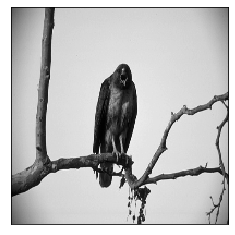

<IPython.core.display.Javascript object>

In [3]:
img = cv.imread("42049.jpg", 0)
size=200
img = cv.resize(img, dsize=(size, size)) 
width=img.shape[0]
height=img.shape[1]

plt.imshow(img, cmap="gray")
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.show()


In [4]:
i = 0
j = 0
luv = []

for h in range(int(width / 2)):
    j = 0
    for k in range(int(height / 2)):
        luv.append([img[i, j], img[i + 1, j], img[i, j + 1], img[i + 1, j + 1]])
        j = j + 2
    i = i + 2

<IPython.core.display.Javascript object>

In [5]:
import time as t

cluster = 24

clusterssize = [cluster]  # 2, 3, 4, 5, 6, 7, 8, 9,
timearray = []
error = []
segementedImg = []

<IPython.core.display.Javascript object>

In [6]:
for i in clusterssize:

    start = t.time()
    kmeans = kmeansAlgo.Kmeans(n_clusters=i, random_state=0, max_iter=50)
    kmeans.fit(np.array(luv))

    timearray.append(t.time() - start)

    segementedImg.append(kmeans.labels)

    pic2show = kmeans.centroids
    print(timearray)

[0.37296557426452637]


<IPython.core.display.Javascript object>

In [7]:
lables = np.array(kmeans.labels)
print(np.array(kmeans.labels).shape)
print(kmeans.centroids.shape)

clustercenters = (kmeans.centroids).reshape(cluster, 4)
centersp = (kmeans.centroids).reshape(cluster, 4)
centersp.shape

(10000,)
(24, 4)


(24, 4)

<IPython.core.display.Javascript object>

In [8]:
finalval = []
for i in range(lables.shape[0]):
    finalval.append(centersp[lables[i]])

finalval = np.array(finalval).reshape(int(width / 2), int(height / 2), 4)

<IPython.core.display.Javascript object>

In [9]:
# pd.DataFrame(kmeans.cluster_centers_[kmeans.labels_])

<IPython.core.display.Javascript object>

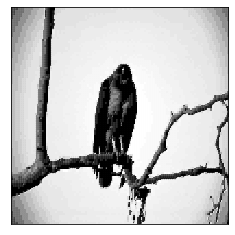

<IPython.core.display.Javascript object>

In [10]:
# convert back the clustered image to the original form
# decoding

temp = np.zeros((width, height))
i = 0
j = 0
for h in range(int(width / 2)):
    j = 0
    for k in range(int(height / 2)):
        val = finalval

        temp[i, j] = val[h][k][0]
        temp[i + 1, j] = val[h][k][1]
        temp[i, j + 1] = val[h][k][2]
        temp[i + 1, j + 1] = val[h][k][3]

        j = j + 2
    i = i + 2

plt.imshow(temp, cmap="gray")
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.savefig("Kmeans_SegementdIMg_" + str(cluster) + ".jpg")
plt.show()

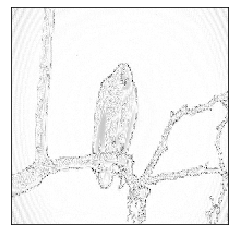

<IPython.core.display.Javascript object>

In [11]:
plt.imshow(256 - abs(img - temp), cmap="gray")
plt.xticks([])
plt.yticks([])
plt.grid(False)

plt.savefig("Kmeans_SegementdIMg_error_" + str(cluster) + ".jpg")
plt.show()

In [12]:
psnr = p.psnr(np.array(img).astype(int), np.array(temp).astype(int))
psnr

27.70939506483044

<IPython.core.display.Javascript object>

In [13]:
snr = p.snr(np.array(img).astype(int), np.array(temp).astype(int))
psnr

27.70939506483044

<IPython.core.display.Javascript object>